##Term Project - Understanding the Impact of various intervention strategies on Building’s                                                    Energy Usage through Agent Based Models
### Author: Albert Thomas and Bharadwaj Mantha 
#### Complex Systems 530 - Computer Modeling of Complex Systems (Winter 2015)
  * Course ID: CMPLXSYS 530
  * Course Title: Computer Modeling of Complex Systems
  * Term: Winter 2015 
  * Date modified - 3_20_2015
  * Time 10:50 PM

# 1. Problem Statement

The main objective of this project is to create an agent based model, that simulates the effects of dynamic occupant interactions and interventions such as variations in the building performance levels and frequent education programs in reducing the energy usage of the building. 

## 2. Why ABM for solving the problem

There are dynamic occupant interactions and building manager interventions during the life time of a building which can affect the energy usage patterns in a building. To represent this dynamic nature, ABM provides the best solution. 

In this notebook, we will develop a simple model that:
* uses object-oriented concepts, e.g., classes
* implements an agent-based approach to Building Energy Modeling
* demonstrates how an institution or norm set by Building Manager can influence the building systems efficiency and the energy use patterns of occupants. 

## 3. Defining the Model

### Space

In this model, our space will be a two-dimensional (2D) square grid. Each grid cell will contain zero or one people. Edges of the grid will wrap around.

### Actors 

#### Agents

This Agent Based Model will have two different types of agents, 
* Building Occupants - who live and interact in the space (building) and
* Building Managers - who are responsible for the dynamic interventions such as educational programs, building maintenance etc.

#### Institution

In this model Building manager (one of the agents in this model) sets the institutions/ norms i.e. the frequency of maintenance activities and educational awareness programs. 

### Initial conditions

#### Agents

* Building occupants will be randomly distributed throughout the grid by sampling from a uniform discrete distribution with replacement. In the event that an occupant has already been placed at the sampled location, we continue drawing a new nandom position until it is unoccupied.
* Building occupants will have their probability of interaction randomly initialized to a value from any continuous distribution.
* Building Managers have their probability of interventions randomly initialized. 

#### Institutions

* The building energy efficiency set to a default level of 100% at the start of the simualation.

### Model Parameters

Based on the description above, we need the following model parameters:

 * ``grid_size``: size of the two-dimensional square grid, i.e., dimension length of the space
 * ``population_size``: number of occupants in the building; must be less than ${grid\_size}^2$
 * `` prob_interaction``: prabability of occupants interacting. 
 
### List of sweep parameters
 
 * ``population_size`` : keeping the space constant how population_size changes the energy usage in buildings
 * ``user_type`` : Initial percentage of low, medium, and high energy users
 * `` maintenance_frequency`` : The frequency of maintenance of the building
 * ``affect_AP `` affect of awareness programs on the occupants

In [3]:
# Scientific computing imports
import numpy 
import numpy.random
import networkx
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
cmap = seaborn.cubehelix_palette(light=1, as_cmap=True)

class Building_Occupants():
    
    """
    Occipant class, which encapsulates the entire behavior of an occupant in a building.
    
    """    
        
    def __init__ (self, model, occupant_id, user_type, energy_consumption
                  ):
        """
        Constructor for Building_Occupants class
        By default,
        user_type = "Medium_User" i.e. medium energy user. 
    
        """
        self.model = model
        self.occupant_id = occupant_id
        self.user_type= user_type
        self.energy_consumption = energy_consumption
        

In [4]:
# Scientific computing imports
import numpy 

class Model(object):
    """
    Model class, which encapsulates the entire behavior of a single "run" in our HIV ABM.
    
    """
    def __init__(self,
                 grid_size, 
                 population_size, 
                 numOfYears,
                 low_users,
                 medium_users,
                 high_users,
                 low_user_consume = 200,
                 medium_user_consume = 300,
                 high_user_consume = 400,
                 avg_Efficiency = 1,
                 total_energy = 30000
                ):
        
        # Setting the model parameters;
        self.grid_size = grid_size
        self.population_size = population_size
        self.numOfYears = numOfYears
        self.low_users = low_users
        self.medium_users = medium_users
        self.high_users = high_users
        self.low_user_consume = low_user_consume
        self.medium_user_consume = medium_user_consume
        self.high_user_consume = high_user_consume
        self.avg_Efficiency = avg_Efficiency
        self.total_energy = total_energy
        
        self.high_users = self.population_size-self.low_users-self.medium_users
    # Setting the state variables
        self.occupants_list = []
        
        self.create_occupants()
        self.total_energy_conusmption()
    
    def create_occupants(self):
        for occupant_id in range(self.population_size):
            if (occupant_id < self.low_users):
                self.occupants_list.append(Building_Occupants(self, 
                                                              occupant_id, 
                                                              user_type = "low_user",
                                                              energy_consumption = self.low_user_consume
                                                             )
                                          )
            if (occupant_id >= self.low_users and occupant_id < self.low_users + self.medium_users):
                self.occupants_list.append(Building_Occupants(self, 
                                                              occupant_id, 
                                                              user_type = "medium_user",
                                                              energy_consumption = self.medium_user_consume
                                                             )
                                          )
            elif (occupant_id >= self.low_users + self.medium_users):
                self.occupants_list.append(Building_Occupants(self, 
                                                              occupant_id, 
                                                              user_type = "high_user",
                                                              energy_consumption = self.high_user_consume
                                                             )
                                          )
                    
    
    #-----------------------------------------------------------------------------------------------
    def bldgEfficiency_decrease(self):
        """
        This method generates the yearly decrease in building efficiency.
        A building's efficiency is determined by the systems efficiency and the material property variations 
        """
        syst_eff_dec = numpy.random.uniform(0.5,1.5) # Building systems normally have the biggest influence on the eff
        mat_eff_dec = numpy.random.uniform(0,0.5)
        
        bldg_eff_dec = syst_eff_dec + mat_eff_dec
        
        return bldg_eff_dec
    
    
    def bldgWalls_Maintenance(self):
        """
        This method generates increase in building efficiency due to maintenance of building walls
        """
        # The performance of a building enevelope is dependent upon the insulation property R- Value of the material 
        
        walls_Rvalue_inc = numpy.random.uniform(0.1,0.5)
        bldg_eff_inc_walls = 2*walls_Rvalue_inc 
        # The increase in building efficiency due to increase in R-Value is
        # is modelled as two times the R-Value increase. Normally this is a calculation done in the the energy simulation
        # software. For teh context of this project, it is modelled in a simple way.
        
        return bldg_eff_inc_walls
    
    def bldgRoofs_Maintenance(self):
        
        """
        This method generates increase in building efficiency due to maintenance of building roofs
        """
        # The performance of a building enevelope is dependent upon the insulation property R- Value of the material 
        
        roof_Rvalue_inc = numpy.random.uniform(0.1,0.5)
        bldg_eff_inc_roof = 2*roof_Rvalue_inc
        
         # The increase in building efficiency due to increase in R-Value is
        # is modelled as two times the R-Value increase. Normally this is a calculation done in the the energy simulation
        # software. For teh context of this project, it is modelled in a simple way.
        
        return bldg_eff_inc_roof

    
    def edu_Programs(self):
        """
        This function decides the frequency of educational awareness programs stochastically 
        """
        # creating an empty list 
        edu_List= []
        
        for i in range(self.numOfYears):
            edu_List.append(0)
        for i in range(self.numOfYears):
            edu_List[i]= numpy.random.binomial(1,0.5)
       
        return edu_List 
    # If the output cell value is 1, that means there is an educational progarm 
    # for that particular year
    
    def step(self, wallMfreq, roofMfreq):
        """
        Model step function. 
        """
    
        bldgEfficiencyList =[]
        bldgEfficiencyList.append(100)
        
        for i in range(1,self.numOfYears):
            #print i 
            if i % wallMfreq ==0 and i % roofMfreq == 0 :
                bldgEfficiencyList.append (bldgEfficiencyList[i-1] - self.bldgEfficiency_decrease()+ self.bldgWalls_Maintenance()+ self.bldgRoofs_Maintenance())
                #print 'both' ## These print statements just for understanding and later remove
            elif i % wallMfreq == 0:    
                bldgEfficiencyList.append (bldgEfficiencyList[i-1] - self.bldgEfficiency_decrease()+ self.bldgWalls_Maintenance())
                #print 'only wall maintenance'
            elif i % roofMfreq == 0:    
                bldgEfficiencyList.append (bldgEfficiencyList[i-1] - self.bldgEfficiency_decrease()+ self.bldgRoofs_Maintenance())
                #print 'only roof maintenance'
            else:
                bldgEfficiencyList.append (bldgEfficiencyList[i-1] - self.bldgEfficiency_decrease())        
                #print 'no maintenance'
        #print "Buiilding performance Variation Pattern: \n"
        #print bldgEfficiencyList     
        self.avg_Efficiency =  sum(bldgEfficiencyList)/(100*self.numOfYears)
        #print self.avg_Efficiency
    #---------------------------------------------------------------------------------
    
    def total_energy_conusmption(self):
        #print (self.low_users*self.low_user_consume + self.medium_users*self.medium_user_consume + self.high_users*self.high_user_consume) 
        self.total_energy = self.low_users*self.low_user_consume + self.medium_users*self.medium_user_consume + self.high_users*self.high_user_consume
        self.total_energy = self.total_energy*self.avg_Efficiency
        #print total_energy

In [21]:
m = Model(grid_size = 3,
          population_size = 10, 
          numOfYears = 10, 
          low_users = 2, 
          medium_users = 3, 
          high_users = 5
         )

m.step(2,5)

for i in range(len(m.occupants_list)):
    m.occupants_list[i]
    print((i, 
           m.occupants_list[i].occupant_id, 
           m.occupants_list[i].user_type,
           m.occupants_list[i].energy_consumption))
    
m.total_energy


(0, 0, 'low_user', 200)
(1, 1, 'low_user', 200)
(2, 2, 'medium_user', 300)
(3, 3, 'medium_user', 300)
(4, 4, 'medium_user', 300)
(5, 5, 'high_user', 400)
(6, 6, 'high_user', 400)
(7, 7, 'high_user', 400)
(8, 8, 'high_user', 400)


IndexError: list index out of range

In [6]:
# Parameter Sweep values
num_scenarios = 25

low_users_sweep = [10,20,30,40,50]
medium_users_sweep = [10,20,30,40,50]
#high_users_sweep = 100-low_users-medium_users
sweep_output = []

# Iterate over low_users_sweep
for low_users in low_users_sweep:
    # Iterate over medium_user_sweep
    for medium_users in medium_users_sweep:
        print("Running {0} scenarios for low_users {1}, medium_users {2}"\
                  .format(num_scenarios, low_users, medium_users))
        m = Model(grid_size = 3,
                  population_size = 100, 
                  numOfYears = 10, 
                  low_users = low_users, 
                  medium_users = medium_users, 
                  high_users = 100-low_users-medium_users
                 )
        m.step(2,5)
        m.total_energy_conusmption()
        #generate the output
        sweep_output.append([m.low_users, 
                             m.medium_users, 
                             m.high_users, 
                             m.avg_Efficiency,
                             m.total_energy])

#printout the values and check
print sweep_output

Running 25 scenarios for low_users 10, medium_users 10
Running 25 scenarios for low_users 10, medium_users 20
Running 25 scenarios for low_users 10, medium_users 30
Running 25 scenarios for low_users 10, medium_users 40
Running 25 scenarios for low_users 10, medium_users 50
Running 25 scenarios for low_users 20, medium_users 10
Running 25 scenarios for low_users 20, medium_users 20
Running 25 scenarios for low_users 20, medium_users 30
Running 25 scenarios for low_users 20, medium_users 40
Running 25 scenarios for low_users 20, medium_users 50
Running 25 scenarios for low_users 30, medium_users 10
Running 25 scenarios for low_users 30, medium_users 20
Running 25 scenarios for low_users 30, medium_users 30
Running 25 scenarios for low_users 30, medium_users 40
Running 25 scenarios for low_users 30, medium_users 50
Running 25 scenarios for low_users 40, medium_users 10
Running 25 scenarios for low_users 40, medium_users 20
Running 25 scenarios for low_users 40, medium_users 30
Running 25

## Network Interactions

In [83]:
from pandas import *
import pandas as pd
pd.DataFrame(sweep_output,columns=['Low_users','Medium_Users','High_Users','Avg_Bldg_Efficiency','Total_Energy_Consumption'])
#DataFrame.from_items(orient='index', columns=['low_users', 'medium_users', 'high_users','4','5'])

,Low_users,Medium_Users,High_Users,Avg_Bldg_Efficiency,Total_Energy_Consumption
0,10,10,80,0.954068,35300.521075
1,10,20,70,0.950387,34213.949557
2,10,30,60,0.951264,33294.225565
3,10,40,50,0.964719,32800.439900
4,10,50,40,0.962138,31750.564564
5,20,10,70,0.963818,33733.622221
6,20,20,60,0.952837,32396.458373
7,20,30,50,0.960197,31686.501798
8,20,40,40,0.949878,30396.097840
9,20,50,30,0.961571,29808.706150


### PANDAS Practice

In [37]:
from pandas import *
import pandas as pd

DataFrame.from_items([('Scenario 1', [m.low_users, m.medium_users, 3]), ('Scenario 2', [4, 5, 6])],
                         orient='index', columns=['low_users', 'medium_users', 'high_users'])
#DataFrame([('Scenario 1',[m.low_users,m.medium_users])],columns=['low_users','medium_users'])

,low_users,medium_users,high_users
Scenario 1,50,50,3
Scenario 2,4,5,6


## Future Works

Firstly, we plan to develop more methods which include interacting occupants and step method to finally compute the energy consumption alongside improving the existing framework we developed till date. In addition to that we will keep on developing the current framework. 

## Results

### Overview of the results

Created Model Space and allocated occupants in the space
Simulated the building performance variation pattern and the presence of educational programs over the lifetime of a building.
 


### Hypothesis of the results

One of the very obvious results we expect is by increasing the number of occupants in the space, building energy consumption increases. But we are interesting in looking at the results based on the initial percentage of the occupants (low, medium and high).  


In [7]:
# Get the network of infections
edge_weight = {}
edge_color = {}
count = 11

test=[] # Just for testing the

for i in range(1,count):
    print i
    test.append((i,i+1,i+2,i+3))
# Iterate over all interactions
for e in test: #m.history_interactions:
    # Check if we have recorded this pair before.
    if (e[1], e[2]) not in edge_weight:
        edge_weight[(e[1], e[2])] = 1
        
        if e[-1] == True:
            edge_color[(e[1], e[2])] = "red"
        else:
            edge_color[(e[1], e[2])] = "#dddddd"
    else:
        edge_weight[(e[1], e[2])] += 1
        
        if e[-1] == True:
            edge_color[(e[1], e[2])] = "red"
        else:
            edge_color[(e[1], e[2])] = "#dddddd"

1
2
3
4
5
6
7
8
9
10


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[]


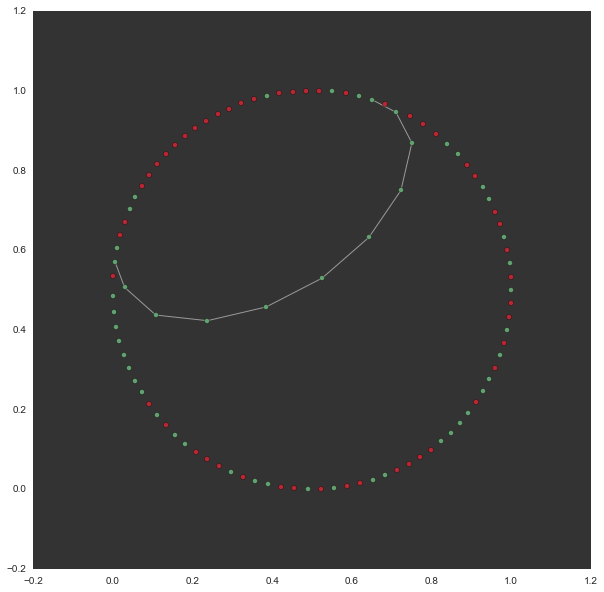

In [14]:
%matplotlib inline

# Import widget methods
from IPython.html.widgets import *
# Create graph
g = networkx.Graph()
g.add_nodes_from(range(m.population_size))
g.add_edges_from(edge_weight.keys())
g_layout = networkx.spring_layout(g, iterations=100)

# Get node info
low_users_nw = [i for i in range(m.population_size) if m.occupants_list[i].user_type == "low_user"]
print low_users_nw

medium_users_nw = [i for i in range(m.population_size) if m.occupants_list[i].user_type == "medium_user"]

print medium_users_nw
high_users_nw = [i for i in range(m.population_size) if m.occupants_list[i].user_type == "high_user"]

print high_users_nw
# Now we can visualize the infection network.
f = plt.figure(figsize=(10, 10))
ax = f.gca()
networkx.draw_networkx_nodes(g, g_layout,
                       nodelist=medium_users_nw,
                       node_size=25,
                       node_color='#b92732')

networkx.draw_networkx_nodes(g, g_layout,
                       nodelist=high_users_nw,
                       node_size=25,
                       node_color='#eee8aa')


networkx.draw_networkx_nodes(g, g_layout,
                       node_size=25,
                       nodelist=low_users_nw,
                       node_color='#64a171')

networkx.draw_networkx_edges(g, g_layout, 
                       width=1, 
                       alpha=0.5,
                       edge_cmap=cmap,
                       edge_color=edge_weight.values())

ax.grid(False)
ax.set_axis_bgcolor("#333333")


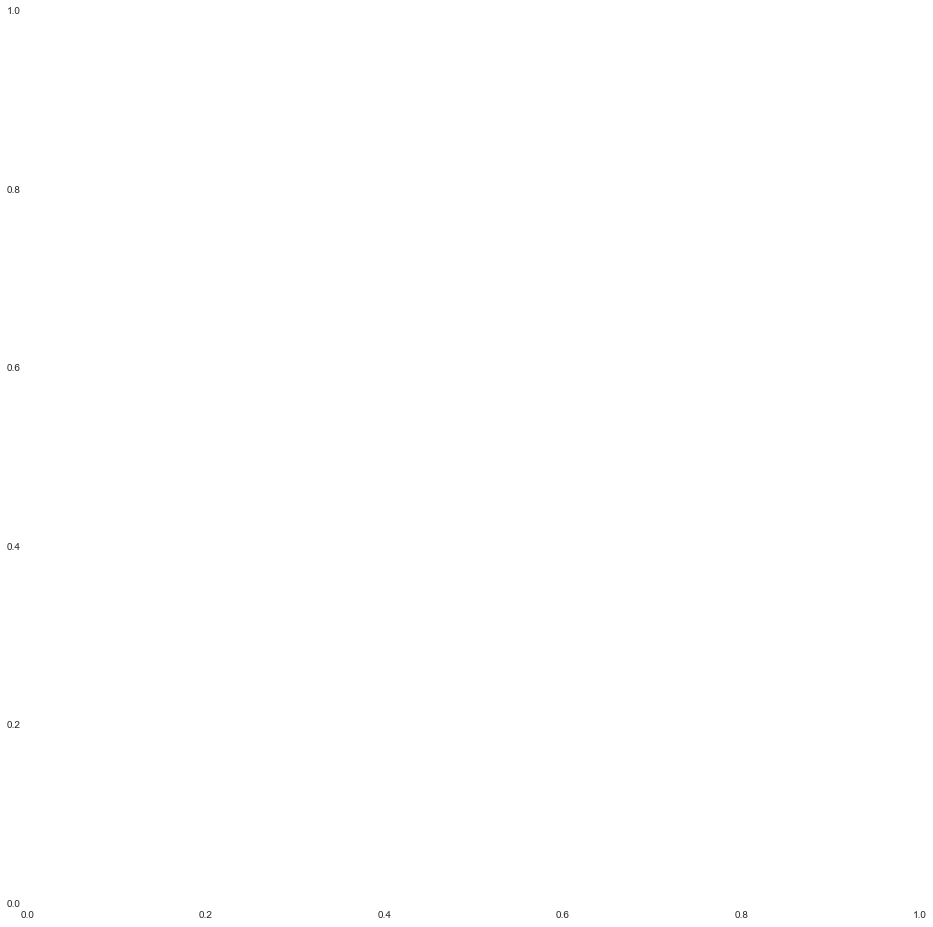

In [57]:
f = plt.figure(figsize=(16, 16))
ax = f.gca()
networkx.draw_networkx_nodes(g, g_layout,
                       nodelist=infected_nodes,
                       node_size=25,
                       node_color='#b92732')